In [47]:
import torch
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from lightly.transforms import utils
from lightly.data import LightlyDataset
from sklearn.preprocessing import normalize
import json

from lightly.loss import NTXentLoss
from lightly.models.modules.heads import SimCLRProjectionHead
import torch
import torch.nn as nn
import torchvision
import pytorch_lightning as pl


In [48]:
%run model.py
%run utils.py

In [23]:
path_to_data = "data/train"

In [43]:
def tsne(embeddings):

    tsne = TSNE(
        n_components=2,    
        perplexity=30,    
        learning_rate=200,
        max_iter=1000,
        random_state=42
    )

    embeddings = tsne.fit_transform(embeddings)
    
    plt.figure(figsize=(4, 3))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], s=50, alpha=0.7)
    plt.title("t-SNE of embeddings")
    plt.show()

In [42]:
def loss(losses):
    epochs = range(1, len(losses) + 1)
    
    plt.figure(figsize=(4, 3))
    plt.plot(epochs, losses, marker='o', linestyle='-')
    plt.xlabel("Epoch")
    plt.ylabel("Training Loss")
    plt.title("Training Loss")
    plt.grid(True)
    plt.show()

In [39]:
def results(model_path, input_size):
    test_transform = torchvision.transforms.Compose(
        [
            torchvision.transforms.Resize((input_size, input_size)),
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Normalize(
                mean=utils.IMAGENET_NORMALIZE["mean"],
                std=utils.IMAGENET_NORMALIZE["std"],
            ),
        ]
    )
    dataset_test = LightlyDataset(input_dir=path_to_data, transform=test_transform)
    dataloader_test = torch.utils.data.DataLoader(
        dataset_test,  # type: ignore
        batch_size=16,
        shuffle=False,
        drop_last=False,
        num_workers=8,
    )
    model = SimCLRModel.load_from_checkpoint(f"saved/{model_path}.ckpt")
    model.eval()
    model.freeze()
    embeddings, filenames = generate_embeddings(model, dataloader_test)

    with open(f"metrics/{model_path}.json", "r") as file:
        train_metrics = json.load(file)
    loss(train_metrics["losses"])
    tsne(embeddings)
    print("End loss: ", train_metrics["losses"][-1])

In [27]:
def generate_embeddings(model, dataloader):
    """Generates representations for all images in the dataloader with
    the given model
    """
    model.eval()
    embeddings = []
    filenames = []
    with torch.no_grad():
        for img, _, fnames in dataloader:
            img = img.to(model.device)
            emb = model.backbone(img).flatten(start_dim=1)
            embeddings.append(emb)
            filenames.extend(fnames)

    embeddings = torch.cat(embeddings, 0)
    embeddings = normalize(embeddings)
    return embeddings, filenames

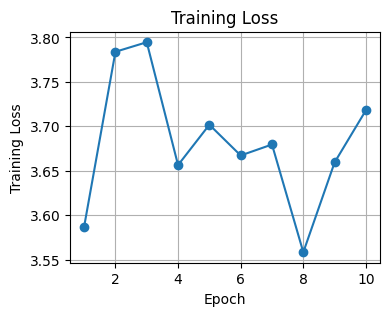

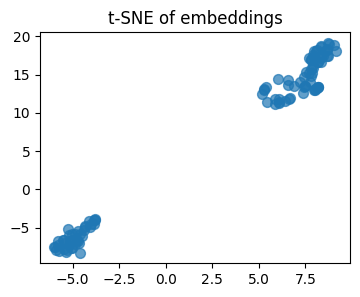

End loss:  3.718092679977417


In [45]:
results("model_16_128_0.06_10", input_size=128)

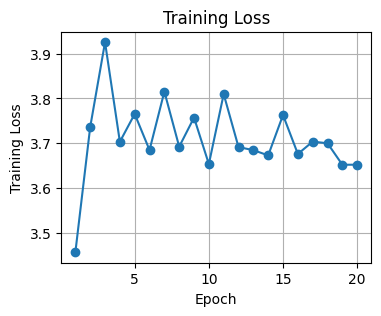

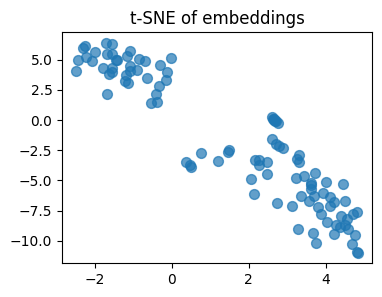

End loss:  3.6522819995880127


In [44]:
results("model_16_128_0.0005_20", input_size=128)

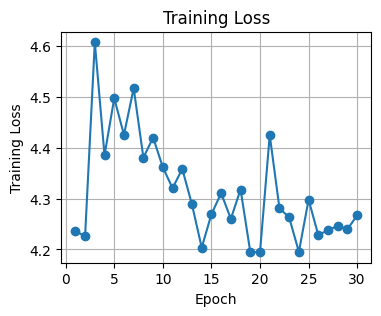

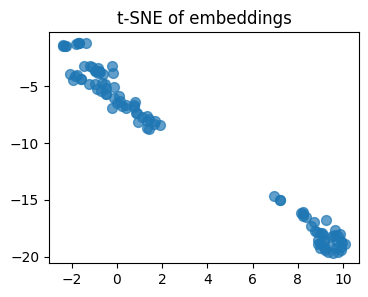

End loss:  4.267133712768555


In [46]:
results("model_32_128_5e-05_30", input_size=128)

In [49]:
torch.__version__

'2.6.0'

In [50]:
torchvision.__version__

'0.21.0'

In [51]:
pl.__version__

'2.6.0'

In [53]:
import lightly
lightly.__version__

'1.5.22'

In [54]:
import numpy

In [57]:
import pandas
pandas.__version__

'2.2.2'

In [59]:
import PIL

In [62]:
matplotlib.__version__

'3.9.1'

In [61]:
import matplotlib